# Tìm khuôn mặt trong ảnh
Chúng ta bắt đầu bằng cách tải một hình ảnh mẫu bằng thư viện hình ảnh Python. Hãy tiếp tục và **chạy ô bên dưới** để xem hình ảnh.

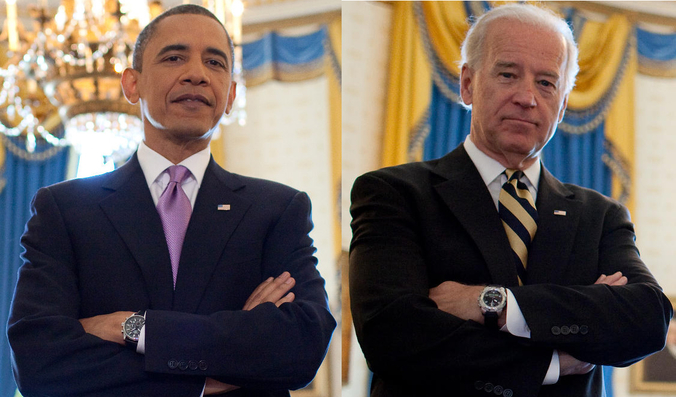

In [3]:
from PIL import Image, ImageDraw
from IPython.display import display

# Chương trình sẽ tìm kiếm khuôn mặt trong ví dụ dưới đây
pil_im = Image.open('two_people.jpg')
display(pil_im)

# Học từ ví dụ
Bây giờ chúng tôi cho thư viện hai khuôn mặt khác nhau ([Joe Biden](/biden.jpg), [Barack Obama](/obama.jpg)) và tạo ra mã hóa cho họ. Mã hóa đơn giản là một biểu diễn chiều thấp của một khuôn mặt mà có thể được dễ dàng so sánh với các khuôn mặt khác mà thư viện sẽ nhận dạng trong tương lai.

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# Đây là một ví dụ về việc nhận diện khuôn mặt trên một ảnh đơn và vẽ một hộp xung quanh mỗi người được nhận diện.

# Tải ảnh mẫu và học cách nhận diện nó.
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Tải ảnh mẫu thứ hai và học cách nhận diện nó.
biden_image = face_recognition.load_image_file("biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Tạo mảng các mã hóa khuôn mặt đã biết và tên của họ
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]
print('Đã học mã hóa cho', len(known_face_encodings), 'ảnh.')

# Hiển thị thời gian
Cuối cùng, chúng ta tải hình ảnh mà chúng ta đã xem trong ô đầu tiên, tìm các khuôn mặt trong hình ảnh và so sánh chúng với các mã hóa mà thư viện đã tạo ra ở bước trước đó. Chúng ta có thể thấy rằng thư viện hiện tại nhận diện đúng Barack và Joe trong hình ảnh đầu vào.

In [ ]:
# Tải một hình ảnh có khuôn mặt không xác định
unknown_image = face_recognition.load_image_file("two_people.jpg")

# Tìm tất cả các khuôn mặt và mã hóa khuôn mặt trong hình ảnh không xác định
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

# Chuyển đổi hình ảnh thành hình ảnh định dạng PIL để chúng ta có thể vẽ lên trên đó với thư viện Pillow
# Xem thêm tại http://pillow.readthedocs.io/ để biết thêm về PIL/Pillow
pil_image = Image.fromarray(unknown_image)
# Tạo một thể hiện vẽ ImageDraw Draw để vẽ
draw = ImageDraw.Draw(pil_image)

# Lặp qua mỗi khuôn mặt được tìm thấy trong hình ảnh không xác định
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Xem xem khuôn mặt có phải là trùng khớp với khuôn mặt đã biết không
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # Hoặc thay vào đó, sử dụng khuôn mặt đã biết có khoảng cách nhỏ nhất với khuôn mặt mới
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Vẽ một hộp xung quanh khuôn mặt bằng cách sử dụng mô-đun Pillow
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))

    # Vẽ một nhãn với tên dưới khuôn mặt
    text_width, text_height = draw.textsize(name)
    draw.rectangle(((left, bottom - text_height - 10), (right, bottom)), fill=(0, 0, 255), outline=(0, 0, 255))
    draw.text((left + 6, bottom - text_height - 5), name, fill=(255, 255, 255, 255))

# Xóa thư viện vẽ khỏi bộ nhớ theo tài liệu của Pillow
del draw

# Hiển thị hình ảnh kết quả
display(pil_image)